# 미니 프로젝트 : 가위바위보 분류기를 만들자

## 라이브러리 버전을 확인해 봅니다
사용할 라이브러리 버전을 둘러봅시다.



In [1]:
import tensorflow as tf
import numpy as np

print(tf.__version__)
print(np.__version__)

2.6.0
1.21.4


In [2]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import os


## 데이터를 준비하자
웹캠이 없다면 아래 섹션을 이용해보자
- mkdir -p ~/aiffel/rock_scissor_paper    
- ln -s ~/data/* ~/aiffel/rock_scissor_paper
- cd ~/aiffel/rock_scissor_paper && unzip data.zip


## 데이터 불러오기 + Resize 하기
(5) 숫자 손글씨의 경우 이미지 크기가 28x28 이었기 때문에, 우리의 가위, 바위, 보 이미지도 28x28로 만들어야 합니다. 이를 위해서는 PIL 라이브러리를 사용해볼 거예요. 그러려면 먼저 라이브러리를 불러와야 겠죠?

In [3]:
from PIL import Image
import glob
import os

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [4]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

131  images to be resized.
131  images resized.
가위 이미지 resize 완료!


자 그러면, 바위 이미지도 28x28 로 만들어 볼까요? 아래 빈 칸에 코드를 작성하고, 실행해보세요. 바위 이미지가 모두 28x28로 바뀌어야 합니다.

In [5]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

131  images to be resized.
131  images resized.
바위 이미지 resize 완료!


마지막으로 보 이미지도 28x28로 만들어 봅시다.

In [6]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

131  images to be resized.
131  images resized.
보 이미지 resize 완료!


(6) 숫자 손글씨 인식기는 mnist.load_data() 라는 함수로 데이터를 읽었던 것 기억하시죠? 여러분들이 아직 코딩에 익숙하지 않을 수 있으므로, 가위, 바위, 보 데이터를 읽을 수 있는 load_data() 함수를 만들어 드릴 거예요. 이 코드를 활용하면 임의의 사진 데이터(ex. 귤이 잘 익었나, 안 익었나? 웃는 얼굴인가, 우는 얼굴인가, 평범한 표정의 얼굴인가? 등)에 적용하실 수 있을 겁니다.

load_data() 함수는 입력으로 이미지가 있는 폴더 위치를 받습니다. 여기서는 rock_scissor_paper 폴더 위치를 적어주면 됩니다. 숫자 손글씨는 0~9 까지의 클래스가 있었던 것 기억하시죠? 가위바위보의 경우 3개의 클래스 즉, 가위: 0, 바위: 1, 보: 2 로 라벨링이 될 것입니다.

In [7]:
import numpy as np

def load_data(img_path, number_of_data=393):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 393 입니다.
x_train shape: (393, 28, 28, 3)
y_train shape: (393,)


한번 이미지를 불러 볼까요?

라벨:  0


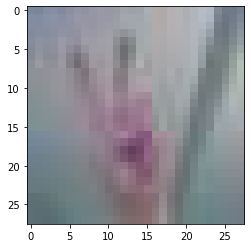

In [8]:
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

## 딥러닝 네트워크 설계하기
자 이제 데이터의 준비가 끝났습니다. 이제 여러분들이 가위바위보를 인식하는 딥러닝 네트워크를 설계해 볼까요?

In [9]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3))) 
# 16 - 입력한 이미지의 특징을 몇 가지 살펴볼 것인가
# input_shape - 입력이미지의 형태 
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
# 32 - 입력한 이미지의 특징을 몇 가지 살펴볼 것인가
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
# 32 - 분류기 알고리즘을 얼마나 복잡하게 할 것인가?(복잡한 문제일수록 이 수를 늘려보자)
model.add(keras.layers.Dense(3, activation='softmax'))
# 10 - 최종 분류기의 class 수

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 9

## 딥러닝 네트워크 학습시키기
잘 설계가 되었다면, 이제 학습을 시켜봅시다. 아마도 여러분들의 데이터는 거의 비슷비슷할 것이기 때문에 accuracy가 꽤 높게 나올 것입니다.

In [10]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=10)

Epoch 1/10
13/13 [==============================] - 6s 62ms/step - loss: 1.1064 - accuracy: 0.3435
Epoch 2/10
13/13 [==============================] - 0s 8ms/step - loss: 1.0977 - accuracy: 0.3690
Epoch 3/10
13/13 [==============================] - 0s 8ms/step - loss: 1.0958 - accuracy: 0.4198
Epoch 4/10
13/13 [==============================] - 0s 8ms/step - loss: 1.0945 - accuracy: 0.4249
Epoch 5/10
13/13 [==============================] - 0s 8ms/step - loss: 1.0928 - accuracy: 0.4148
Epoch 6/10
13/13 [==============================] - 0s 8ms/step - loss: 1.0944 - accuracy: 0.3690
Epoch 7/10
13/13 [==============================] - 0s 8ms/step - loss: 1.0880 - accuracy: 0.5852
Epoch 8/10
13/13 [==============================] - 0s 8ms/step - loss: 1.0856 - accuracy: 0.5623
Epoch 9/10
13/13 [==============================] - 0s 8ms/step - loss: 1.0813 - accuracy: 0.4504
Epoch 10/10
13/13 [==============================] - 0s 9ms/step - loss: 1.0767 - accuracy: 0.4478


## 얼마나 잘 만들었는지 확인하기(테스트)
여러분들은 300장의 가위바위보 이미지를 만들어 모두 학습에 사용했습니다. 그러므로 테스트 데이터가 없죠. 옆 친구의 이미지 데이터 300장을 받아오세요. 그리고 그것을 테스트 데이터로 하여 test accuracy를 측정해보세요. (만약 웹캠이 없는 경우 섹션을 진행하신 경우, 이미 test 데이터셋이 준비돼있으니 친구에게 조르지 않으셔도 됩니다)
- mkdir -p ~/aiffel/rock_scissor_paper/test

우선 테스트용 데이터인 x_test, y_test를 만들어 봅시다.

In [11]:
# x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 아주 유사합니다.
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)

100  images to be resized.
100  images resized.


In [12]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images(image_dir_path)

100  images to be resized.
100  images resized.


In [13]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(image_dir_path)

100  images to be resized.
100  images resized.


In [14]:
import numpy as np

def load_data_test(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("테스트 데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data_test(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

테스트 데이터(x_test)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


In [15]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

10/10 - 0s - loss: 48.4367 - accuracy: 0.3333
test_loss: 48.436668395996094
test_accuracy: 0.3333333432674408


## 더 좋은 네트워크 만들어 보기

In [16]:
# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=256
n_channel_2=256
n_channel_3=256
n_dense=128
n_train_epoch=20

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(n_channel_3, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_norm, y_train, batch_size = 64, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, batch_size = 64,verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 256)       7168      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 256)       590080    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 256)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 3, 256)         590080    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 1, 1, 256)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)              

## 시각화
다양한 파라미터 별로 결과를 정리하고 이를 시각화해보았다.
(loss, accuracy, validation_loss, validation_accuracy)

Epoch 1/20
7/7 [==============================] - 0s 38ms/step - loss: 1.0875 - accuracy: 0.4351 - val_loss: 1.0844 - val_accuracy: 0.3333
Epoch 2/20
7/7 [==============================] - 0s 32ms/step - loss: 1.0911 - accuracy: 0.3588 - val_loss: 1.0870 - val_accuracy: 0.4067
Epoch 3/20
7/7 [==============================] - 0s 34ms/step - loss: 1.0840 - accuracy: 0.4402 - val_loss: 1.0816 - val_accuracy: 0.4800
Epoch 4/20
7/7 [==============================] - 0s 33ms/step - loss: 1.0775 - accuracy: 0.4020 - val_loss: 1.0715 - val_accuracy: 0.4267
Epoch 5/20
7/7 [==============================] - 0s 33ms/step - loss: 1.0663 - accuracy: 0.5344 - val_loss: 1.0693 - val_accuracy: 0.3367
Epoch 6/20
7/7 [==============================] - 0s 33ms/step - loss: 1.0390 - accuracy: 0.5089 - val_loss: 1.0475 - val_accuracy: 0.4567
Epoch 7/20
7/7 [==============================] - 0s 32ms/step - loss: 1.0243 - accuracy: 0.4682 - val_loss: 1.0654 - val_accuracy: 0.3400
Epoch 8/20
7/7 [===========

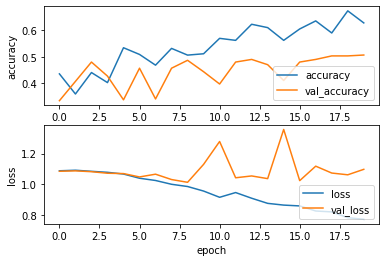

In [17]:
history = model.fit(x_train_norm, y_train, batch_size = 64, epochs=n_train_epoch, validation_data = (x_test_norm, y_test))

plt.subplot(211)
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc = 'lower right')
plt.subplot(212)
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc = 'lower right')
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, batch_size = 64,verbose=2)

## 어떤 데이터를 잘못 추론했는지 눈으로 확인해보기

### n번째 데이터를 추론한 결과 확인

In [18]:
predicted_result = model.predict(x_test_norm)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  # n번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [0.26745778 0.3994993  0.33304298]
model이 추론한 가장 가능성이 높은 결과 :  1
실제 데이터의 라벨 :  0


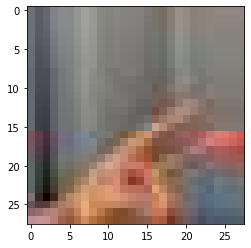

In [19]:
# n번째 데이터
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

### 잘못 추론한 데이터를 모아서 확인하기

예측확률분포: [0.44395092 0.1569829  0.3990662 ]
라벨: 2, 예측결과: 0


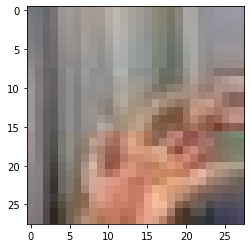

예측확률분포: [0.16398706 0.48168772 0.35432526]
라벨: 0, 예측결과: 1


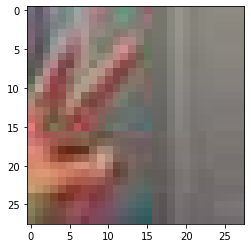

예측확률분포: [0.29104403 0.390264   0.31869197]
라벨: 0, 예측결과: 1


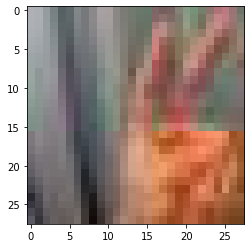

예측확률분포: [0.4058219  0.05349216 0.54068595]
라벨: 1, 예측결과: 2


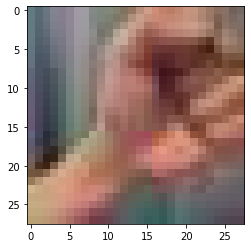

예측확률분포: [0.18079546 0.5802176  0.23898694]
라벨: 0, 예측결과: 1


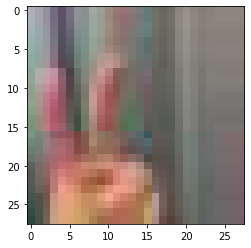

In [20]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

## 프로젝트 결과 및 회고
- 이번 프로젝트는 이미지를 다루는 프로젝트로 가위, 바위, 보의 형상을 가진 사람의 손을 분석하여 가위(0), 바위(1), 보(2)로 분류하는 목적을 가지고 있습니다. 이를 위해서 우선 데이테셋이 필요한데 저는 기본적으로 주어진 데이터셋을 활용하고 추가적으로 팀원의 데이터셋을 추가하여 오버피팅 현상을 극복하고자 시도하였습니다. 
    - 주어진 가위(100), 바위(100), 보(100) 데이터셋 + 새로 만든 가위(31), 바위(31), 보(31) 데이터셋)
    
- 오버피팅을 극복하기 위해서 저는 데이터셋 추가와 정규화를 시도하였으며 결과적으로 데이터 셋을 추가하기 전보다 오버피팅 현상이 줄어든 것을 시각화를 통해 확인할 수 있었습니다.

- 또한 모델읠 성능(정확도) 개선을 위해서 저는 두 가지 방법을 시도하였습니다. 우선 keras Sequential API의 하이퍼 파라미터 값을 조정해보며 정확도의 변화를 살펴보았습니다. 다음으로는 레이어 층을 2개에서 3개로 늘려보면서 정확도의 변화를 살펴보았습니다. 실행때마다 정확도 수치가 바뀌는 것을 고려하더라도 층을 늘리고 하이퍼 파라미터들을 변경하였을 때 평균적으로 더 높은 정확도를 보이는 것을 확인하였습니다.
    - (레이어가 2층일 때에는 주로 30~40 사이의 정확도를 보이다가 3층으로 늘린 후에는 주로 50을 넘는 정확도를 보였습니다.)
    
- 이 프로젝트를 진행한 후에 다른 이론적인 노드와 Deep ML 시간 학습을 통해 처음 제가 프로젝트 진행할 때 마구잡이로 바꿔본 값들이 잘못된 것을 알게 되었고 모델의 성능을 개선하기 위해 레이어 층을 늘리고 데이터셋을 추가하여 오버피팅을 극복하는 등 제가 만든 모델을 좀 더 개선할 수 있는 방법을 알게 되었습니다.

- 다음은 제가 진행하면서 얻은 정확도 수치 중 60퍼센트를 넘는 결과 중 하나 입니다.
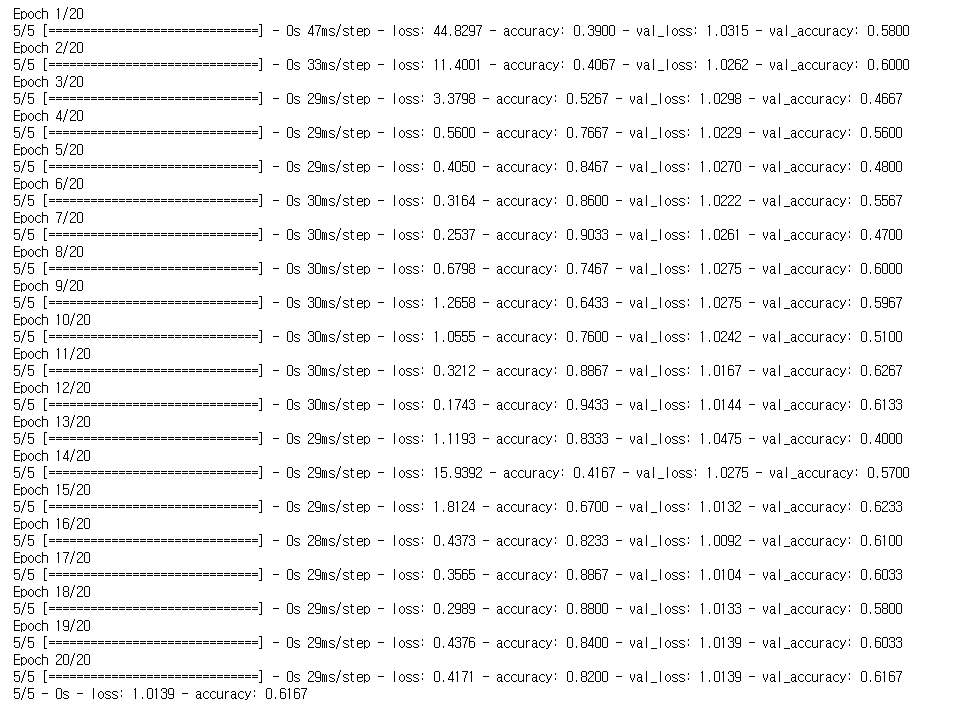